In [14]:
import pandas as pd
df = pd.read_csv("data.csv")
df = df.sample(n=5000,random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.604,1939,0.993,['Εστουδιαντίνα Χριστοδουλίδη'],0.437,174395.0,0.407,0.0,5yvbLK2LCR0I27hLY7YMpx,0.0000,3.0,0.4790,-10.482,1.0,Βαρύτερα απ' τα σίδερα,0.0,1939-01-01,0.0966,65.676
1,0.787,1947,0.900,['Raúl Abríl'],0.478,138548.0,0.520,0.0,11tO8S6SR5O5q7sqXRorP9,0.0920,7.0,0.3660,-8.549,0.0,Patos Mareados - Remastered,0.0,1947-01-12,0.0526,175.275
2,0.712,1926,0.982,['Jelly Roll Morton'],0.599,173747.0,0.415,0.0,3AnJH3BujXmyNJZg8Wb85M,0.4640,3.0,0.0786,-4.564,1.0,Black Bottom Stomp,1.0,1926,0.0380,136.822
3,0.339,1981,0.796,['ABBA'],0.475,233720.0,0.260,0.0,6TvxPS4fj4LUdjw2es4g21,0.0016,5.0,0.1090,-15.997,1.0,Slipping Through My Fingers,60.0,1981,0.0322,137.212
4,0.613,1980,0.434,['Dead Kennedys'],0.219,133040.0,0.976,0.0,0WFI6O0j9BDwrHtZrScbj5,0.5000,11.0,0.3090,-2.934,1.0,Let's Lynch the Landlord,39.0,1980-09-02,0.0967,161.285


In [15]:
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "valence", "danceability", "energy", "tempo",
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

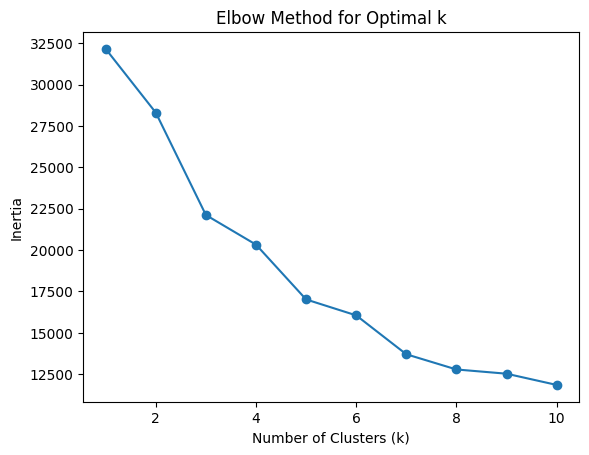

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

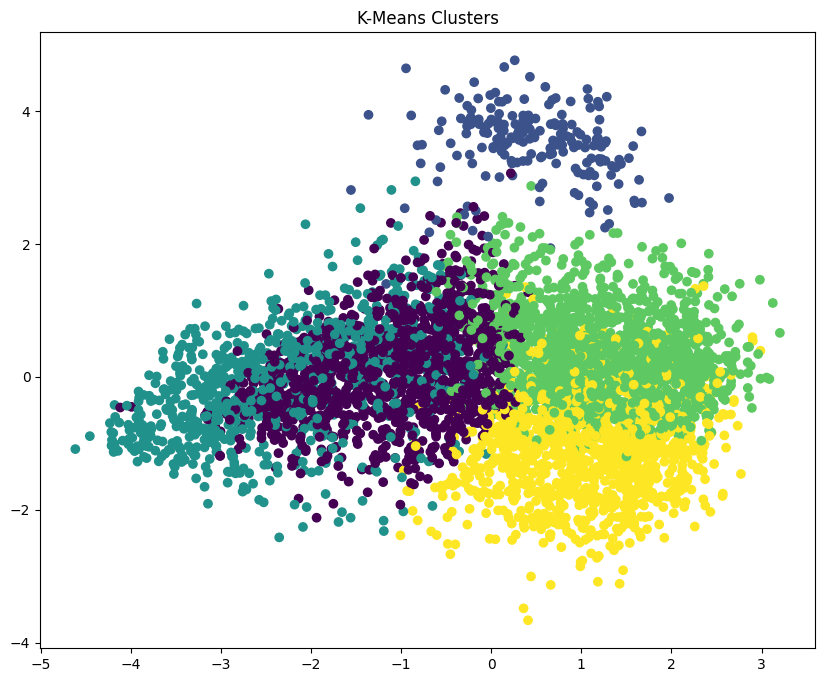

In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Get the cluster of the input song
    song_cluster = df[df["name"] == song_name]["Cluster"].values[0]

    # Filter songs from the same cluster
    same_cluster_songs = df[df["Cluster"] == song_cluster]

    # Calculate similarity within the cluster
    song_index = same_cluster_songs[same_cluster_songs["name"] == song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][["name", "year", "artists"]]

    return recommendations

In [23]:
input_song =  "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Ensure the song exists in the dataframe
    if song_name not in df['name'].values:
        return f"Song '{song_name}' not found in the dataset."

    # Find the index of the song
    song_index = df[df['name'] == song_name].index[0]

    # Ensure the song index is within bounds
    if song_index >= len(df):
        return f"Index {song_index} is out of bounds for the dataset of size {len(df)}."

    # Example similarity matrix (replace with actual similarity computation)
    similarity = np.random.rand(len(df), len(df))  # Replace with actual similarity matrix

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]

    # Return the recommended songs
    recommendations = df.iloc[similar_songs][["name", "year", "artists"]]

    return recommendations

# Example usage
input_song = "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
print(recommended_songs)


Songs similar to 'Camby Bolongo':
Song 'Camby Bolongo' not found in the dataset.


In [21]:
input_song = "Soul Junction"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
df.to_csv("clustered_df.csv")